<a href="https://colab.research.google.com/github/Laraibtabassum99/Machine-learning/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Predict the Restaurant Ratings

1. Import Libraries: This cell imports the   necessary Python libraries for data manipulation, machine learning, and visualization.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

2. Load Data: This cell reads the data from the "Dataset .csv" file into a pandas DataFrame called df and displays the first few rows to give you a glimpse of the data.

In [ ]:
df = pd.read_csv("/content/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


3. This cell mounts your Google Drive to access files stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. This cell identifies columns with numerical data and fills any missing values in these columns with the mean of their respective columns.

In [ ]:
import numpy as np
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

5. This cell identifies columns with categorical data (text or object type) and fills any missing values with the most frequent value (mode) in each column.


In [ ]:
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

6.  This cell converts categorical columns into a numerical format that machine learning models can understand. It creates new binary columns for each unique category in the specified columns. drop_first=True is used to avoid multicollinearity.

In [ ]:
categorical_cols = ['Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

7. This cell separates the data into features (X) and the target variable (y), which is 'Aggregate rating'. It also removes columns that are not needed for the model. Then, it splits the data into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
X = df.drop(['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose'], axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

8.  This cell initializes and trains two regression models: Linear Regression and Decision Tree Regressor, using the training data.

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

tree_model=DecisionTreeRegressor(random_state=32)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=32)

9. This cell uses the trained models to make predictions on the test data.

In [ ]:
linear_pred=linear_model.predict(X_test)
tree_pred=tree_model.predict(X_test)

10. This cell calculates and prints the Mean Squared Error (MSE) and R-squared (R2) score for both models. These metrics help evaluate how well the models perform.

In [ ]:
linear_mse=mean_squared_error(y_test,linear_pred)
tree_mse=mean_squared_error(y_test,tree_pred)
linear_r2=r2_score(y_test,linear_pred)
tree_r2=r2_score(y_test,tree_pred)
print("Linear Regression MSE:", linear_mse)
print("Decision Tree Regression MSE:", tree_mse)
print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree Regression R2 Score:", tree_r2)

Linear Regression MSE: 0.03759690334591976
Decision Tree Regression MSE: 0.05672946101517529
Linear Regression R2 Score: 0.9840368943538718
Decision Tree Regression R2 Score: 0.9759134849191925


11.  This cell calculates the importance of each feature in the Decision Tree model. This helps understand which features contribute most to the model's predictions.

In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

12.  This cell filters out features with importance below a certain threshold (0.001) and then creates a bar plot to visualize the importance of the most influential features.

/tmp/ipython-input-43-599949035.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=important_features, palette="magma")


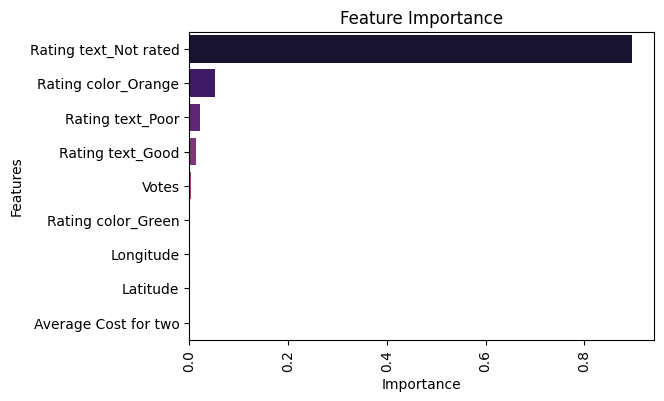

In [ ]:
importance_threshold = 0.001
important_features = feature_importances[feature_importances['importance'] > importance_threshold]

important_features = important_features.sort_values('importance', ascending=False)


plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=important_features, palette="magma")
plt.xticks(rotation=90)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()